# データの読み込み
irisデータセットという「花（アヤメ）」に関する有名なデータがあります

data：ガクの長さ・ガクの幅・花弁の長さ・花弁の幅

target：花（アヤメ）の種類

In [133]:
"""読み込み
"""
from sklearn.datasets import load_iris
iris = load_iris()

In [134]:
"""データの内訳
"""
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# データ分割
訓練データ：モデルを作成するためのデータ

テストデータ：作成したモデルの性能を検証するデータ

過学習：訓練データにのみ当てはまりの良いモデルを作成してしまうこと。訓練データ・テストデータ双方に当てはまりがよくないといいモデルとは言えない

In [152]:
"""データ分割
・説明変数と目的変数を与える
・テストデータを全体の何％にするか決める
・固定にするか否か
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.3,  random_state=0)

# 決定木

In [182]:
"""基本モデルの作成
"""
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [183]:
"""モデルの最適化
"""
clf = clf.fit(X_train, y_train)

In [184]:
"""テストデータの予測
"""
predicted = clf.predict(X_test)

In [185]:
"""正解率の算出
"""
print(sum(predicted==y_test)/len(y_test))

0.9777777777777777


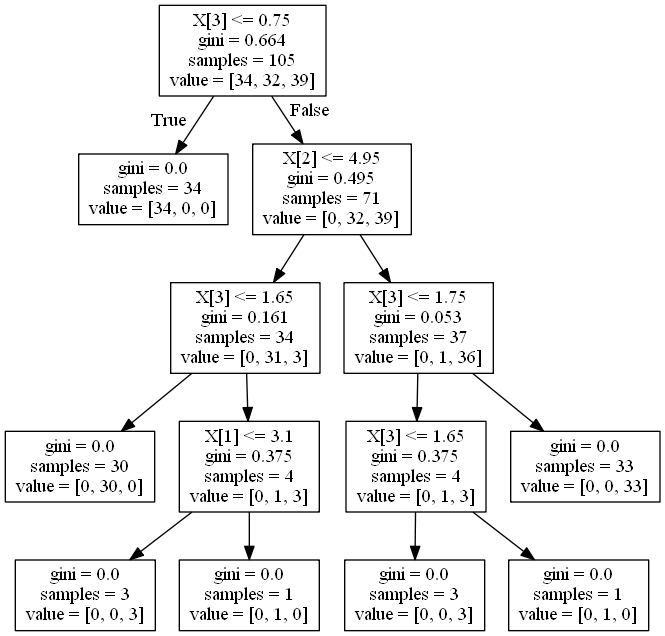

In [186]:
"""結果の描画
"""
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
from IPython.display import Image
graph.progs = {'dot': r"C:\Program Files (x86)\Graphviz2.38\bin\dot.exe"}
Image(graph.create_png())

# ランダムフォレスト

In [141]:
"""基本モデルの作成
"""
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [142]:
"""モデルの最適化
"""
clf = clf.fit(X_train, y_train)

c:\users\root\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [143]:
"""テストデータの予測
"""
predicted = clf.predict(X_test)

In [144]:
"""正解率の算出
"""
print(sum(predicted==y_test)/len(y_test))

0.9555555555555556


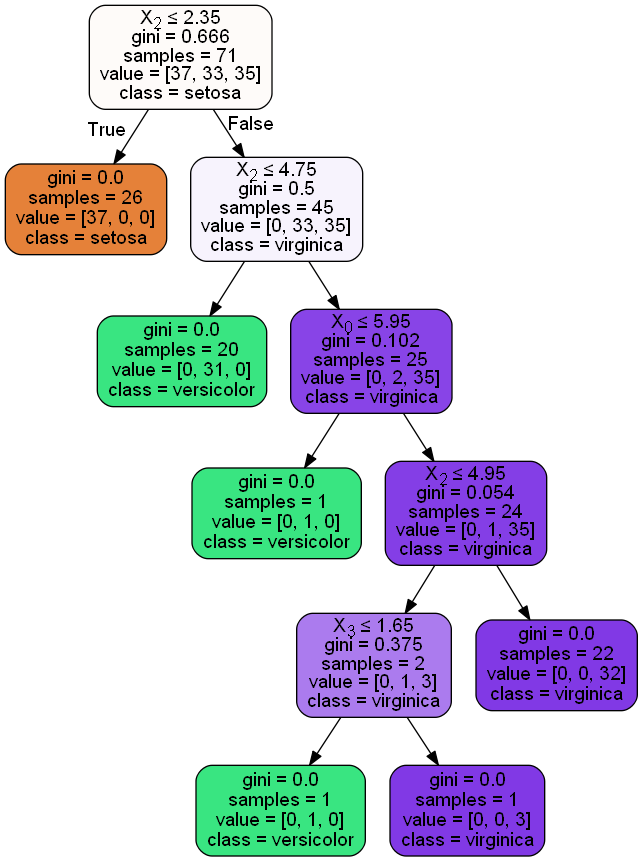

In [145]:
"""結果の描画
"""
import numpy as np
from sklearn import datasets
from sklearn import __version__ as sklearn_version
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import pydotplus as pdp
plt.rcParams["font.family"] = "IPAexGothic"# 無視していい

# 生成された木の1個目を可視化
estimator = clf.estimators_[0]
dot_data = tree.export_graphviz(
    estimator,
    out_file=None,
    filled=True,
    rounded=True,
    class_names=iris.target_names,
    special_characters=True
)
graph = pdp.graph_from_dot_data(dot_data)
graph.progs = {'dot': r"C:\Program Files (x86)\Graphviz2.38\bin\dot.exe"}
Image(graph.create_png())

# サポートベクタマシン

In [161]:
"""基本モデルの作成
"""
from sklearn.svm import SVC
model = SVC(kernel='linear') # カーネルには　rbf　poly　などがある

In [162]:
"""モデルの最適化
"""
clf = clf.fit(X_train, y_train)

In [163]:
"""テストデータの予測
"""
predicted = clf.predict(X_test)

In [164]:
"""正解率の算出
"""
print(sum(predicted==y_test)/len(y_test))

0.9777777777777777


# K近傍法

In [178]:
"""基本モデルの作成
"""
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6) 

In [179]:
"""モデルの最適化
"""
clf = clf.fit(X_train, y_train)

In [180]:
"""テストデータの予測
"""
predicted = clf.predict(X_test)

In [181]:
"""正解率の算出
"""
print(sum(predicted==y_test)/len(y_test))

0.9777777777777777
